# Problem Set 3, due Wednesday, May 2nd at 10 pm.

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa
program](http://en.wikipedia.org/wiki/Oportunidades), a government
social assistance program in Mexico. This program, as well as the
details of its impact, are described in the paper "[School subsidies
for the poor: evaluating the Mexican Progresa poverty
program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)",
by Paul Shultz (available on Canvas).  The data
(progresa_sample.csv.gz) is available on canvas
in files/data.

Please read the paper to familiarize yourself with
the PROGRESA program before beginning this problem set, so you have a
rough sense of where the data come from and how they were
generated. If you just proceed into the problem set without
understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic
econometric techniques that you are learning in class to measure the
impact of Progresa on secondary school enrollment rates, in particular
differences-in-differences.  Your task is to **estimate the impact of
_progresa_ subsidies on the school attendance**.  Note: this asks to
estimate a causal effect.

The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from
Canvas. The data are actual data collected to evaluate the impact of
the Progresa program.  In this file, each row corresponds to an
observation taken for a given child for a given year. There are two
years of data (1997 and 1998), and just under 40,000 children who are
surveyed in both years.  For each child-year observation, the
following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey (=1)|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = "pobre", not poor = "no pobre"|
|progresa |treatment = "basal", control = "0"|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|enrolled in school in 1997 (=1) |

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Report summary statistics (mean, standard deviation, and number of missings) for all of
the demographic variables in the dataset (i.e., everything except
year, folnum, village).  Present the actual levels for 'progresa' and
'poor'.  Do these fit with the documentation above?

Present these in a single table alphabetized
by variable name. Do NOT simply expect the grader to scroll through
your output!

In [25]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline 


In [4]:
df = pd.read_csv('progresa_sample.csv')

replacement = {'pobre':1, 'no pobre':0, '0': 0, 'basal':1}
df = df.replace({'poor':replacement, 'progresa':replacement})

columns = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n',
       'min_dist', 'dist_cap', 'poor', 'progresa', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age', 'grc97', 'sc97']
columns = sorted(columns, key=str.lower)

data = []
for column in columns:
    row = []
    row.append(column)
    row.append(df[column].mean())
    row.append(df[column].std())
    data.append(row)

summary = pd.DataFrame(data)
summary.columns = ['name', 'mean', 'std']
summary

,name,mean,std
0,age,11.366460,3.167744
1,dist_cap,147.674452,76.063134
2,dist_sec,2.418910,2.234109
3,fam_n,7.215715,2.352900
4,grc,3.963537,2.499063
5,grc97,3.705372,2.572387
6,hohage,44.436717,11.620372
7,hohedu,2.768104,2.656106
8,hohsex,0.925185,0.263095
9,hohwag,586.985312,788.133664


### 1.2 Differences at baseline?
Now let's investigate the differences in baseline.  Are the baseline (1997) demographic characteristics **for the poor**
different in treatment and control villages?

I suggest you to use a T-Test to
determine whether there is a statistically significant difference in
the average values of each of the variables in the dataset. Focus only
on the data from 1997 for poor.

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [5]:
columns = ['sex', 'indig', 'dist_sec', 'fam_n',
       'min_dist', 'dist_cap', 'hohedu', 'hohwag',
       'welfare_index', 'hohsex', 'hohage', 'age', 'grc97', 'sc97']
columns = sorted(columns, key=str.lower)

data = []
for column in columns:
    row = []
    row.append(column)
    
    treatment = df[df.year == 97][df.progresa == 1][df.poor == 1][column]
    control = df[df.year == 97][df.progresa == 0][df.poor == 1][column]
    treat_mean = treatment.mean()
    control_mean = control.mean()
    
    row.append(treat_mean)
    row.append(control_mean)
    row.append(treat_mean - control_mean)
    
    tstat, pval = stats.ttest_ind(treatment, control, nan_policy='omit')
    row.append(tstat)
    row.append(pval)
    
    data.append(row)

summary = pd.DataFrame(data)
summary.columns = ['variable', 'average Treatment', 'average Control', 'difference', 't-stat', 'p-value']
summary

/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


,variable,average Treatment,average Control,difference,t-stat,p-value
0,age,10.716991,10.742023,-0.025032,-0.708630,4.785594e-01
1,dist_cap,150.829074,153.769730,-2.940656,-3.339081,8.415005e-04
2,dist_sec,2.453122,2.507662,-0.054540,-2.100433,3.569843e-02
3,fam_n,7.281327,7.302469,-0.021142,-0.794167,4.271039e-01
4,grc97,3.531599,3.543050,-0.011450,-0.400196,6.890151e-01
5,hohage,43.648828,44.276918,-0.628090,-4.775962,1.796243e-06
6,hohedu,2.663139,2.590348,0.072791,2.541229,1.105093e-02
7,hohsex,0.924656,0.922947,0.001709,0.566312,5.711858e-01
8,hohwag,544.339544,573.163558,-28.824015,-3.594588,3.253835e-04
9,indig,0.325986,0.332207,-0.006222,-1.161714,2.453603e-01


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

A:

There are some statistically significant differences between control and treatment. They are in average distance to the capital, distance to secondary school, head of house age, head of house education, head of house wages, min distance to urban centers, sex, and welfare index.

B:

If there are differences at baseline, that means that the variables were different to begin with. This matters because if the variables were different to begin with, that means the differences cannot be attributed to the effects of the treatment.

C:

This implies that the differences cannot be directly attributed to or impacted by the treatment because the variables were different to begin with.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average
enrollment rate in 1997. Create a scatterplot that shows this
relationship. What do you notice?

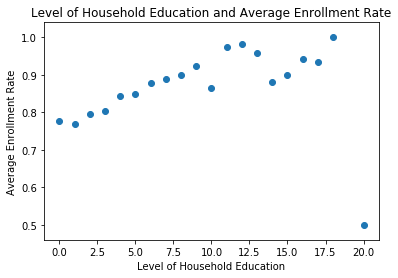

In [6]:
df2 = pd.DataFrame(data=df, columns=['year', 'hohedu', 'sc'])

y = df2[df2.year != 98].groupby('hohedu').mean()['sc']

x = y.index

plt.scatter(x,y)
plt.title("Level of Household Education and Average Enrollment Rate")
plt.xlabel("Level of Household Education")
plt.ylabel("Average Enrollment Rate")
plt.show()

It trends upwards. Except this outlier at 20, though the "average" at 20 is not particularly useful as there are only 2 data points where the head of house had 20 years education.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households
in treated villages**, before and after treatment.  Specifically, for
each village, calculate the average rate of enrollment of poor
households in treated villages in 1997, then compute the average rate
of enrollment of poor households in treated villages in 1998. Create
two separate histograms showing the distribution of these average
enrollments rates, one histogram for 1997 and one histogram for
1998. On each histogram, draw a vertical line that intersects the
x-axis at the average value (across all households). Does there appear
to be a difference? Is this difference statistically significant?

/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


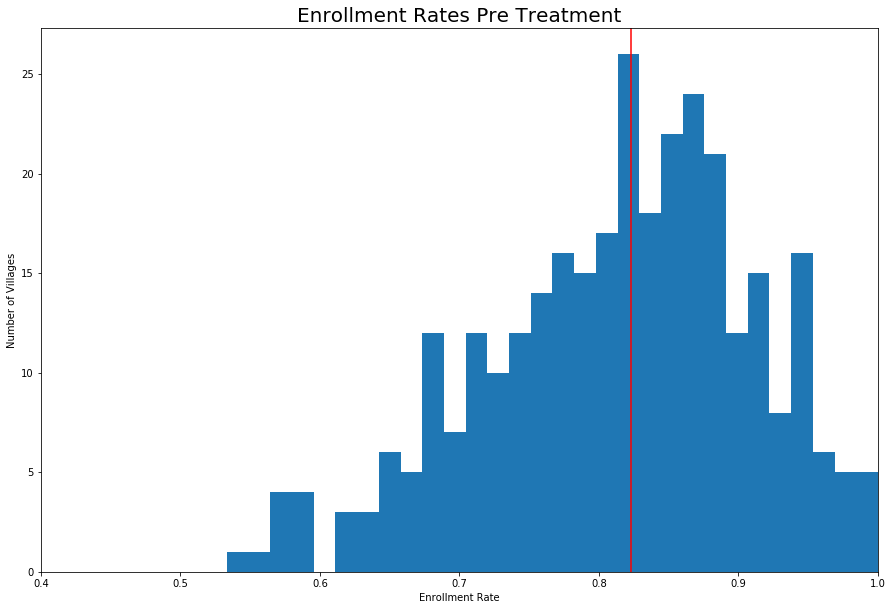

In [10]:
pre_df = df[df.year == 97][df.progresa == 1][df.poor == 1]
previllages = pre_df.village.unique()
predata = []

for village in previllages:
    predata.append(pre_df[pre_df.village == village].sc.mean())

preave = pre_df.sc.mean()

plt.hist(predata,
         bins = 30,
         linewidth = 0.1)

plt.xlim(0.4,1)
plt.gcf().set_size_inches(15,10)
plt.xlabel('Enrollment Rate')
plt.ylabel('Number of Villages')
plt.title('Enrollment Rates Pre Treatment', fontsize=20)
plt.axvline(preave, color='red')

/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


mean 0.8464791213954308


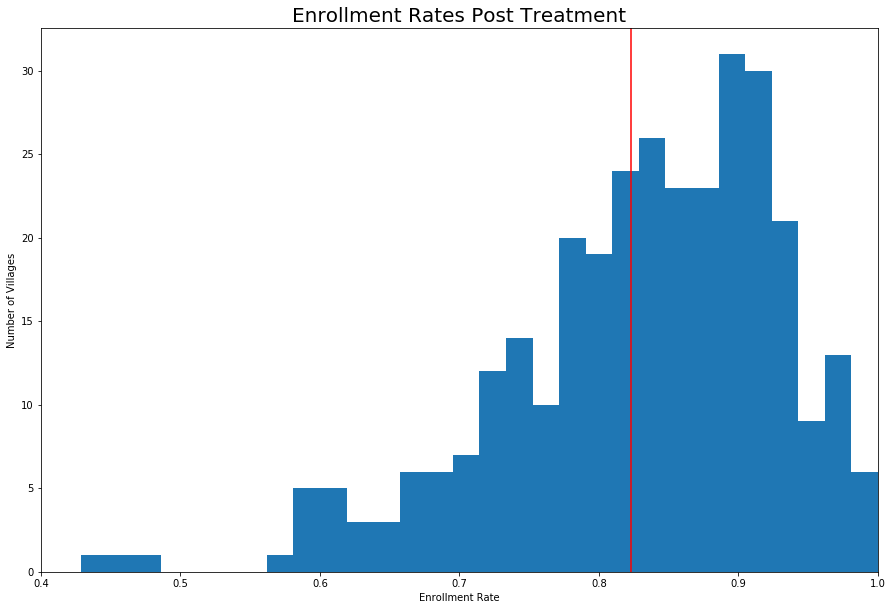

In [11]:
post_df = df[df.year == 98][df.progresa == 1][df.poor == 1]
postvillages = post_df.village.unique()
postdata = []

for village in postvillages:
    postdata.append(post_df[post_df.village == village].sc.mean())

postave = post_df.sc.mean()

print ('mean ' + str(postave))
plt.hist(postdata,
         bins = 30,
         linewidth = 0.1)

plt.xlim(0.4,1)
plt.gcf().set_size_inches(15,10)
plt.xlabel('Enrollment Rate')
plt.ylabel('Number of Villages')
plt.title('Enrollment Rates Post Treatment', fontsize=20)
plt.axvline(preave, color='red')

In [13]:
print (stats.ttest_ind(predata, postdata, nan_policy='omit'))

Ttest_indResult(statistic=-2.015713486515581, pvalue=0.044248700365727124)


There is a difference between 1997 and 1998 for the distribution of average enrollment rates. The 1998 treated villages are skewed slightly more left than the 1997 treated villages. The averages for 1997 and 1998 are similar. With a p-value of .0442, the p-value is less than .05 meaning that the results are statistically significant.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on
the social and economic outcomes of individuals in Mexico. We will
focus on the impact of the program on the poor (those with
poor=='pobre'), since only the poor were eligible to receive the
PROGRESA assistance.

### 2.1 Cross-Sectional Estimator: T-test

Begin by estimating the impact of Progresa using "simple differences."
Restricting yourself to data from 1998 (after treatment), calculate
the average enrollment rate among **poor** households in the Treatment
villages and the average enrollment rate among **poor** households in
the control villages. Use a t-test to determine if this difference is
statistically significant. What do you conclude?

In [14]:
treat = df[df.year == 98][df.poor == 1][df.progresa == 1]
control = df[df.year == 98][df.poor == 1][df.progresa == 0]

print ('control mean ' + str(control.sc.mean()))
print ('treatment mean ' + str(treat.sc.mean()))
print (treat.sc.mean() - control.sc.mean())

print (stats.ttest_ind(treat.sc, control.sc, nan_policy='omit'))

control mean 0.807636956730308
treatment mean 0.8464791213954308
0.0388421646651228
Ttest_indResult(statistic=8.3587205674183735, pvalue=6.6363444473781018e-17)


/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


The p-value is 6.63634e-17 which is extremely small, less than .05. With such a low p-value this means the results between treatment and enrollment are statistically significant.

### 2.2 Cross-Sectional Estimator: Regression

Estimate the effects of Progresa on enrollment using a regression
model, by regressing the 1998 enrollment rates **of the poor** on
treatment assignment.  Do not include any additional control
variables.
Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

Note: I recommend to use statsmodels.formula.api as this allows to use
convenient R-style formulas and provedes nice summaries of the results.

In [17]:
mod = smf.ols(formula='sc ~ progresa', data=df[df.year == 98][df.poor == 1])
result = mod.fit()

print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 02 May 2018   Prob (F-statistic):           6.64e-17
Time:                        17:34:13   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


-Treatment increased the chance of a child enrolling by .0388 acording to this model.

-This is the same as the previous simple differnce test. As such the beta of around .0388 is the same as is the pvalue. The standard error is around .0046.

-We can reject the null hypothesis that the treatment effect is 0.

-As in 2.1 the counterfactual is assumed to be estimated by the control group. There are arguments that this is incorrect.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of
relevant control variables. Include, for instance, age, distance to a secondary
school, gender, education of household head, welfare index,
indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [22]:
mod = smf.ols(formula='sc ~ progresa + sc97 + grc97 + grc + age + dist_sec + sex + indig + fam_n + min_dist + dist_cap + hohwag + hohedu + welfare_index + hohage + hohsex', data=df[df.year == 98][df.poor == 1])
result = mod.fit()

print(result.summary())
print(result.pvalues['progresa'])

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     1345.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        17:39:49   Log-Likelihood:                -3347.5
No. Observations:               26155   AIC:                             6729.
Df Residuals:                   26138   BIC:                             6868.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7796      0.021     38.019

/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


The controls affect the point estimate of treatment effect by .03.

The controls affect the standard error on the treatment effect by .004.

The progresa coefficients and standard error in 2.2 and 2.3 are fairly low, showing that while the models are measuring fairly accurately, there is a weak relationship.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the
difference in 1998 enrollment rates across villages. An alternative
approach would be to compute the treatment effect using a
difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate:

a) the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages

b) the difference (between 1997 and 1998) in enrollment rates among poor households in control villages.

c) The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?

* What is the counterfactual assumption underlying this estimate? 


In [29]:
treatpremean = df[df.year == 97][df.progresa == 1][df.poor == 1].sc.mean()
treatpostmean = df[df.year == 98][df.progresa == 1][df.poor == 1].sc.mean()
treatdiff = treatpostmean - treatpremean

controlpremean = df[df.year == 97][df.progresa == 0][df.poor == 1].sc.mean()
controlpostmean = df[df.year == 98][df.progresa == 0][df.poor == 1].sc.mean()
controldiff = controlpostmean - controlpremean

doublediff = treatdiff - controldiff

print(doublediff)

0.031331280319323085


/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/joermotto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


The estimate of impact is .03133 which is similar to the coefficient found in 2.2 for the relationship between Progresa and enrollment rates of the poor, treated villages (.0388). The counterfactual assumption is that the control and treatment group would be the same before treatment in 1997.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment
effects of the program in a difference-in-differences
framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in
  interpreting your coefficients and standard errors, and make sure to
  specify exactly what units you are measuring and estimating.

* How do these estimates of the treatment effect compare to the
  estimates based on the simple difference?

* How do these estimates compare to the difference-in-difference
  estimates from 2.4 above? What accounts for these differences?

* What is the counterfactual assumption underlying this regression? 

In [32]:
mod = smf.ols(formula="sc ~ progresa + year + year:progresa + age + dist_sec + sex + hohedu + welfare_index + indig", data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     2949.
Date:                Wed, 02 May 2018   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -20393.
No. Observations:               68347   AIC:                         4.081e+04
Df Residuals:                   68337   BIC:                         4.090e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.4162      0.395     -3.585

-This model estimates the impact of progresa as a .0292 change in enrollment rate as a result of the treatment. This effect is very confident with a tiny pvalue of 7.08*10^-8 and accurate to an error |.0054

-The estimate is again a bit smaller than the simple differences, both single and multiple.

-The estimate is different from 2.4 because this version accounts for all the control variables and their effects.

-The counterfactual assumption is again that the treatment group would have, without treatment, changed in the same way as the control group but this time the counterfactual takes into account the control variables.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you
  believe that Progresa had a causal impact on the enrollment rates of
  poor households in Mexico?  Explain by referring to the methods and
  results above.

Based on my analysis I do believe progresa had an impact. Every single model predicted some sort of impact with pretty high levels of statistical significance. If every model is useful, all the models together pointing to the same result is an indication that the result is probably correct. We might consider measuring the pre and post non-poor groups as a second 'control' group. We would take into account control variables of course, but this would help us to model the effect on enrollment of other variables. The counterfactual assumption here would be that the non-poor change in a related way to how the poor treatment group would have changed had it not been treated.